In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings

## Read HIC Combined Data for every year (2007-2021)

In [2]:
os.chdir('../SourceData/aggregateHIC')

In [3]:
##supress "Cannot parse header or footer so it will be ignored" warning
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [4]:
xls = pd.ExcelFile('2007-2021-HIC-Counts-by-CoC.xlsx')
hic_2007 = pd.read_excel(xls, '2007', header=1, skipfooter = 1)
hic_2008 = pd.read_excel(xls, '2008', header=1, skipfooter = 1)
hic_2009 = pd.read_excel(xls, '2009', header=1, skipfooter = 1)
hic_2010 = pd.read_excel(xls, '2010', header=1, skipfooter = 1)
hic_2011 = pd.read_excel(xls, '2011', header=1, skipfooter = 1)
hic_2012 = pd.read_excel(xls, '2012', header=1, skipfooter = 1)
hic_2013 = pd.read_excel(xls, '2013', header=1, skipfooter = 1)
hic_2014 = pd.read_excel(xls, '2014', header=1, skipfooter = 1)
hic_2015 = pd.read_excel(xls, '2015', header=1, skipfooter = 1)
hic_2016 = pd.read_excel(xls, '2016', header=1, skipfooter = 1)
hic_2017 = pd.read_excel(xls, '2017', header=1, skipfooter = 1)
hic_2018 = pd.read_excel(xls, '2018', header=1, skipfooter = 1)
hic_2019 = pd.read_excel(xls, '2019', header=1, skipfooter = 1)
hic_2020 = pd.read_excel(xls, '2020', header=1, skipfooter = 1)
hic_2021 = pd.read_excel(xls, '2021', header=1, skipfooter = 1)

## Merge all years of HIC data into 1 dataset

In [5]:
### Add "Year" row to every HIC raw dataframe
all_hic_raw = [hic_2007, hic_2008, hic_2009, hic_2010, hic_2011, hic_2012,hic_2013,hic_2014,hic_2015,hic_2016,hic_2017,hic_2018,hic_2019,hic_2020,hic_2021]
for i in range(len(all_hic_raw)):
    all_hic_raw[i]["Year"] = 2007+i
hic_2007.Year

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
456    2007
457    2007
458    2007
459    2007
460    2007
Name: Year, Length: 461, dtype: int64

In [6]:
#combined all raw dataframes
hic_years_combined = pd.concat(all_hic_raw, axis=0, ignore_index=True)

In [7]:
hic_years_combined

,CoC,"Total Year-Round Beds (ES,TH)","Total Non-DV Year-Round Beds (ES,TH)","Total HMIS Year-Round Beds (ES,TH)","HMIS Participation Rate (ES,TH)",Total Emergency Shelter (ES) Beds (excluding seasonal+O/V),Total Transitional Housing (TH) Beds,"Total Units for Households with Children (ES,TH)","Total Beds for Households with Children (ES,TH)","Total Beds for Households without Children (ES,TH)",...,Dedicated Youth Beds (TH),Dedicated Veteran Beds (SH),Dedicated Youth Beds (SH),Dedicated Veteran Beds (RRH),Dedicated Youth Beds (RRH),Dedicated Veteran Beds (PSH),Dedicated Youth Beds (PSH),Dedicated Chronically Homeless Beds (PSH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK-500,884.0,804.0,408.0,0.507,500.0,384.0,82.0,255.0,629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,874.0,506.0,95.0,0.188,595.0,279.0,126.0,417.0,457.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,1303.0,1078.0,574.0,0.532,388.0,915.0,166.0,511.0,792.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,459.0,368.0,310.0,0.842,133.0,326.0,57.0,189.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,174.0,127.0,51.0,0.402,36.0,138.0,21.0,75.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,0.0,0.0
6273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,137.0,0.0,15.0,0.0,0.0
6274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,0.0,1.0,27.0,62.0,3.0,82.0,0.0,0.0
6275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,0.0,0.0,74.0,0.0,298.0,0.0,285.0,8.0,0.0


## Cleaning Combined Dataset

Drop Redundant columns

In [8]:
hic_years_combined = hic_years_combined.drop(['Total Year-Round Beds (ES).1', 'Total Year-Round Beds (SH).1', 'Total Year-Round Beds (TH).1',"Total SH Beds"], axis = 1)

Combine two columns with different names

In [9]:
##Function for combining columns with NA's
##Input: dataframe,column1,column2


'''
Combining 2 columns of a Dataframe with NA's
Args:
    dataframe: name of pandas dataframe
    column1, column2: column name (str)

Return:
    single list with values of two combined columns

'''
def combinecol(dataframe,column1,column2):
    combined_list = []
    for i in range(len(dataframe)):
        #if ith value of first column is non null, append to combined_list
        if dataframe[column1][i]==dataframe[column1][i]:
            combined_list.append(dataframe[column1][i])
        elif dataframe[column2][i]==dataframe[column2][i]:
        #if ith value of secon column is non null, append to combined_list
            combined_list.append(dataframe[column2][i])
        else:
            combined_list.append("No Value Recorded")
    return combined_list

Combine 'Coc' and 'CoC Number' Columns into 1 column

In [10]:
hic_years_combined["CoC"] = combinecol(hic_years_combined, "CoC", "CoC Number")
## drop excess column
hic_years_combined = hic_years_combined.drop('CoC Number', axis=1)
hic_years_combined.CoC

0       AK-500
1       AK-501
2       AL-500
3       AL-501
4       AL-502
         ...  
6272    WV-500
6273    WV-501
6274    WV-503
6275    WV-508
6276    WY-500
Name: CoC, Length: 6277, dtype: object

Combine "Total Year-Round Beds (ES).1" and "Total Year-Round ES Beds"

In [11]:
hic_years_combined["Total Year-Round ES Beds"] = combinecol(hic_years_combined, "Total Year-Round Beds (ES)", "Total Year-Round ES Beds")
## drop excess column
hic_years_combined = hic_years_combined.drop('Total Year-Round Beds (ES)', axis=1)
hic_years_combined[["Total Year-Round ES Beds"]].head()

,Total Year-Round ES Beds
0,500.0
1,595.0
2,388.0
3,133.0
4,36.0


In [12]:
hic_years_combined["Total Year-Round TH Beds"] = combinecol(hic_years_combined, "Total Year-Round TH Beds", "Total Year-Round Beds (TH)")
## drop excess column
hic_years_combined = hic_years_combined.drop("Total Year-Round Beds (TH)", axis=1)
hic_years_combined[["Total Year-Round TH Beds"]]

,Total Year-Round TH Beds
0,384.0
1,279.0
2,915.0
3,326.0
4,138.0
...,...
6272,31.0
6273,0.0
6274,36.0
6275,85.0


In [13]:
hic_years_combined["Total Year-Round SH Beds"] = combinecol(hic_years_combined, "Total Year-Round SH Beds", "Total Year-Round Beds (SH)")
## drop excess column
hic_years_combined = hic_years_combined.drop("Total Year-Round Beds (SH)", axis=1)
hic_years_combined[["Total Year-Round SH Beds"]]

,Total Year-Round SH Beds
0,No Value Recorded
1,No Value Recorded
2,No Value Recorded
3,No Value Recorded
4,No Value Recorded
...,...
6272,0.0
6273,8.0
6274,0.0
6275,0.0


## Los Angeles CoC Exploratory Analysis

In [14]:
#extract only LA county HIC and store in LA_hic
LA_hic = hic_years_combined[hic_years_combined["CoC"] == "CA-600"]
LA_hic.head()

,CoC,"Total Year-Round Beds (ES,TH)","Total Non-DV Year-Round Beds (ES,TH)","Total HMIS Year-Round Beds (ES,TH)","HMIS Participation Rate (ES,TH)",Total Emergency Shelter (ES) Beds (excluding seasonal+O/V),Total Transitional Housing (TH) Beds,"Total Units for Households with Children (ES,TH)","Total Beds for Households with Children (ES,TH)","Total Beds for Households without Children (ES,TH)",...,Dedicated Youth Beds (TH),Dedicated Veteran Beds (SH),Dedicated Youth Beds (SH),Dedicated Veteran Beds (RRH),Dedicated Youth Beds (RRH),Dedicated Veteran Beds (PSH),Dedicated Youth Beds (PSH),Dedicated Chronically Homeless Beds (PSH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
49,CA-600,12465.0,10416.0,1359.0,0.13,4400.0,8065.0,1257.0,4327.0,8138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,CA-600,NaN,NaN,NaN,NaN,4517.0,8998.0,1302.0,4499.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,CA-600,NaN,NaN,NaN,NaN,4933.0,10094.0,1491.0,4627.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,CA-600,NaN,NaN,NaN,NaN,4490.0,9025.0,1322.0,4231.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850,CA-600,NaN,NaN,NaN,NaN,NaN,8353.0,1304.0,4157.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Total Year-Round Emergency Shelter beds

In [15]:
LA_hic[["Total Year-Round ES Beds"]]

,Total Year-Round ES Beds
49,4400.0
507,4517.0
955,4933.0
1404,4490.0
1850,5071.0
2282,4477.0
2707,3983.0
3127,4798.0
3544,6855.0
3950,5513.0


<AxesSubplot:xlabel='Year', ylabel='Total Year-Round ES Beds'>

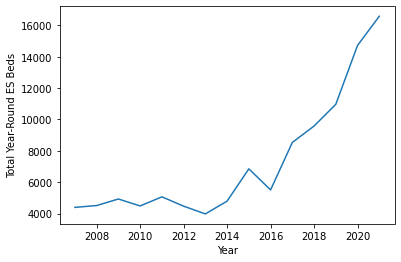

In [16]:
#LA_hic[["Total Year-Round ES Beds"]]
#years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
sns.lineplot(data = LA_hic, x = "Year", y = "Total Year-Round ES Beds")

<AxesSubplot:xlabel='Year', ylabel='Total Year-Round TH Beds'>

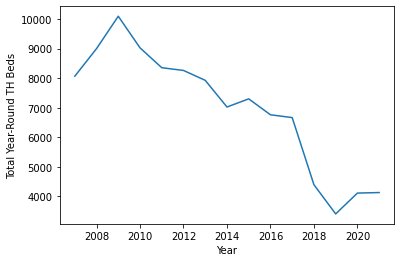

In [17]:
sns.lineplot(data = LA_hic, x = "Year", y = "Total Year-Round TH Beds")

<AxesSubplot:xlabel='Year', ylabel='Total Year-Round SH Beds'>

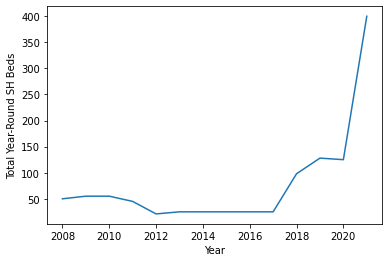

In [20]:
sns.lineplot(data = LA_hic[1:], x = "Year", y = "Total Year-Round SH Beds")